In [ ]:
import os
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from PIL import Image
import random
import torch.nn as nn
import shutil
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random
import timm
from collections import Counter
import torch
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay



# Load Dataset

In [2]:


# Path to your dataset
dataset_path = "Dataset/Original"

# Dictionary to hold image counts
class_image_counts = {}
total_images = 0

# Loop through each class directory
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        image_count = len([
            file for file in os.listdir(class_dir)
            if os.path.isfile(os.path.join(class_dir, file)) and file.lower().endswith(('.png', '.jpg', '.jpeg'))
        ])
        class_image_counts[class_name] = image_count
        total_images += image_count

# Display results
print("Image count per class:")
for class_name, count in class_image_counts.items():
    print(f"{class_name}: {count} images")

print(f"\nTotal images in dataset: {total_images}")


Image count per class:
Benign: 504 images
Early: 985 images
Pre: 963 images
Pro: 804 images

Total images in dataset: 3256


# Apply Augmenation to Balance dataset

In [4]:

# Augmentation transform (can adjust)
augment_transform = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ToTensor()
])


In [5]:
def augment_class_images(class_dir, target_count):
    current_count = len(os.listdir(class_dir))
    print(f"{class_dir} has {current_count} images. Target: {target_count}")
    if current_count >= target_count:
        print("No augmentation needed.")
        return

    images = [img for img in os.listdir(class_dir) if img.endswith(('.jpg', '.png', '.jpeg'))]
    idx = 0
    while current_count < target_count:
        img_name = random.choice(images)
        img_path = os.path.join(class_dir, img_name)
        image = Image.open(img_path).convert("RGB")
        augmented = augment_transform(image)
        
        # Save as PIL Image
        augmented_image = transforms.ToPILImage()(augmented)
        save_path = os.path.join(class_dir, f"aug_{idx}_{img_name}")
        augmented_image.save(save_path)

        current_count += 1
        idx += 1

    print(f"{class_dir} now has {current_count} images.")


In [6]:
# Set target count to match the highest class (Early: 985)
target_per_class = 985

augment_class_images("Dataset/Original/Benign", target_per_class)
augment_class_images("Dataset/Original/Pro", target_per_class)


Dataset/Original/Benign has 505 images. Target: 985
Dataset/Original/Benign now has 985 images.
Dataset/Original/Pro has 805 images. Target: 985
Dataset/Original/Pro now has 985 images.


In [7]:


# Path to your dataset
dataset_path = "Dataset/Original"

# Dictionary to hold image counts
class_image_counts = {}
total_images = 0

# Loop through each class directory
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        image_count = len([
            file for file in os.listdir(class_dir)
            if os.path.isfile(os.path.join(class_dir, file)) and file.lower().endswith(('.png', '.jpg', '.jpeg'))
        ])
        class_image_counts[class_name] = image_count
        total_images += image_count

# Display results
print("Image count per class:")
for class_name, count in class_image_counts.items():
    print(f"{class_name}: {count} images")

print(f"\nTotal images in dataset: {total_images}")


Image count per class:
Benign: 984 images
Early: 985 images
Pre: 963 images
Pro: 984 images

Total images in dataset: 3916


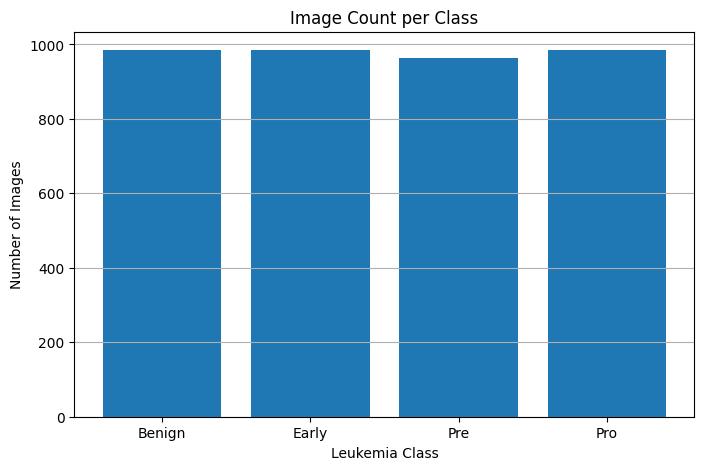

In [8]:
import matplotlib.pyplot as plt

classes = ['Benign', 'Early', 'Pre', 'Pro']
counts = [984, 985, 963, 984]

plt.figure(figsize=(8,5))
plt.bar(classes, counts)
plt.title('Image Count per Class')
plt.xlabel('Leukemia Class')
plt.ylabel('Number of Images')
plt.grid(axis='y')
plt.show()


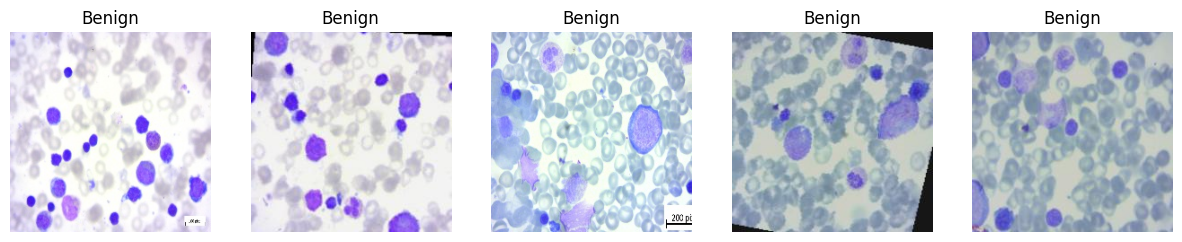

In [ ]:

def show_samples(base_path, class_name, n=5):
    files = os.listdir(os.path.join(base_path, class_name))
    samples = random.sample(files, n)

    plt.figure(figsize=(15,3))
    for i, img in enumerate(samples):
        path = os.path.join(base_path, class_name, img)
        plt.subplot(1, n, i+1)
        plt.imshow(Image.open(path))
        plt.title(class_name)
        plt.axis('off')
    plt.show()

show_samples("Dataset/Original", "Benign", n=5)


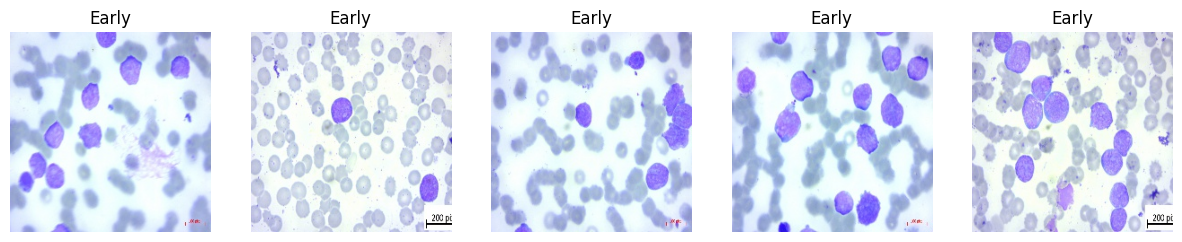

In [10]:
import matplotlib.pyplot as plt
import random

def show_samples(base_path, class_name, n=5):
    files = os.listdir(os.path.join(base_path, class_name))
    samples = random.sample(files, n)

    plt.figure(figsize=(15,3))
    for i, img in enumerate(samples):
        path = os.path.join(base_path, class_name, img)
        plt.subplot(1, n, i+1)
        plt.imshow(Image.open(path))
        plt.title(class_name)
        plt.axis('off')
    plt.show()

show_samples("Dataset/Original", "Early", n=5)


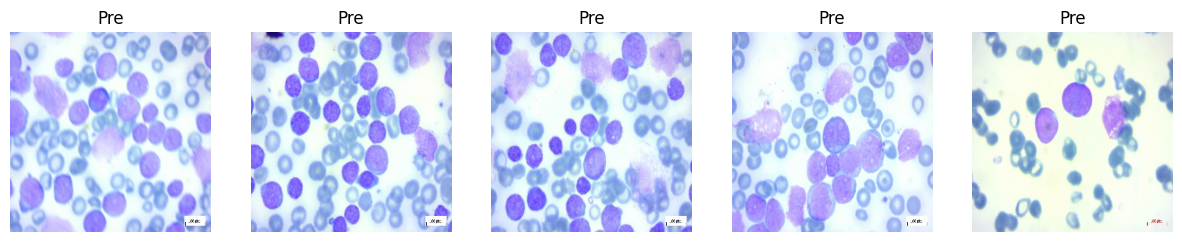

In [11]:
import matplotlib.pyplot as plt
import random

def show_samples(base_path, class_name, n=5):
    files = os.listdir(os.path.join(base_path, class_name))
    samples = random.sample(files, n)

    plt.figure(figsize=(15,3))
    for i, img in enumerate(samples):
        path = os.path.join(base_path, class_name, img)
        plt.subplot(1, n, i+1)
        plt.imshow(Image.open(path))
        plt.title(class_name)
        plt.axis('off')
    plt.show()

show_samples("Dataset/Original", "Pre", n=5)


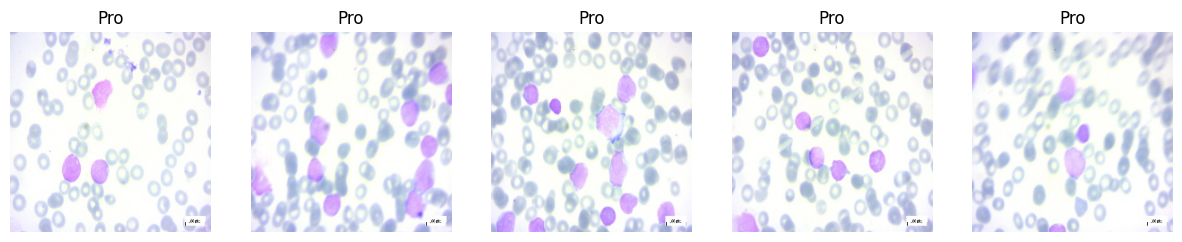

In [ ]:


def show_samples(base_path, class_name, n=5):
    files = os.listdir(os.path.join(base_path, class_name))
    samples = random.sample(files, n)

    plt.figure(figsize=(15,3))
    for i, img in enumerate(samples):
        path = os.path.join(base_path, class_name, img)
        plt.subplot(1, n, i+1)
        plt.imshow(Image.open(path))
        plt.title(class_name)
        plt.axis('off')
    plt.show()

show_samples("Dataset/Original", "Pro", n=5)

# Define Tranformer

In [13]:
common_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize to [-1, 1]
])


dataset_path = "Dataset/Original"
full_dataset = datasets.ImageFolder(dataset_path, transform=common_transform)


# Split dataset

In [15]:
targets = [sample[1] for sample in full_dataset]  # class labels

train_idx, test_idx = train_test_split(
    np.arange(len(targets)),
    test_size=0.2,
    stratify=targets,
    random_state=42
)

train_dataset = Subset(full_dataset, train_idx)
test_dataset = Subset(full_dataset, test_idx)


In [16]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)


In [17]:
for images, labels in train_loader:
    print(f"Image batch shape: {images.shape}")   
    print(f"Label batch shape: {labels.shape}")   


Image batch shape: torch.Size([32, 3, 224, 224])
Label batch shape: torch.Size([32])


In [18]:
print(f"Number of training images: {len(train_dataset)}")
print(f"Number of testing images: {len(test_dataset)}")


Number of training images: 3132
Number of testing images: 784


# Model Building with Xception-BiGru

In [ ]:


NUM_CLASSES = 4
BATCH_SIZE = 32
EPOCHS = 15
LEARNING_RATE = 1e-4
SAVE_DIR = "checkpoints"
os.makedirs(SAVE_DIR, exist_ok=True)


# --------------------- MODEL DEFINITION ---------------------
class XceptionBiGRU(nn.Module):
    def __init__(self, num_classes):
        super(XceptionBiGRU, self).__init__()
        self.cnn = timm.create_model('xception', pretrained=False, num_classes=0)

        

        self.feature_dim = 2048  # Xception output
        self.sequence_len = 49   # 7x7 grid from 224x224 input(down sampl image size)

        self.gru = nn.GRU(
            input_size=self.feature_dim,
            hidden_size=256,
            num_layers=1,
            batch_first=True,
            bidirectional=True
        )

        self.fc = nn.Linear(256 * 2, num_classes)

    def forward(self, x):
        with torch.no_grad():
            feat_map = self.cnn.forward_features(x)  # [B, C, H, W](batch,chanel,h,w)
        B, C, H, W = feat_map.shape
        x_seq = feat_map.view(B, C, H * W).permute(0, 2, 1)  # [B, seq_len, C]#Rearrange
        gru_out, _ = self.gru(x_seq)
        out = gru_out[:, -1, :]  # Last timestep
        return self.fc(out)




In [27]:
# --------------------- TRAINING ---------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = XceptionBiGRU(num_classes=NUM_CLASSES).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

best_acc = 0.0
print("🚀 Training started...\n")

for epoch in range(1, EPOCHS + 1):
    model.train()
    running_loss = 0.0
    train_correct = 0

    print(f"📘 Epoch {epoch} started...")

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = outputs.max(1)
        train_correct += (preds == labels).sum().item()

    train_acc = 100.0 * train_correct / len(train_dataset)
    train_loss = running_loss / len(train_loader)

    # Evaluation Phase
    model.eval()
    val_loss = 0.0
    val_correct = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()

    val_acc = 100.0 * val_correct / len(test_dataset)
    val_loss = val_loss / len(test_loader)

    print(f"✅ Epoch {epoch} completed.")
    print(f"🔹 Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"🔸 Test Loss:  {val_loss:.4f} | Test Acc:  {val_acc:.2f}%\n")

    # Save only the best model (overwrite same file)
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), os.path.join(SAVE_DIR, "best_model.pth"))
        print(f"💾 Best model updated at epoch {epoch} with acc: {best_acc:.2f}%\n")

# Save final model (last epoch)
torch.save(model.state_dict(), os.path.join(SAVE_DIR, "final_model.pth"))
print("🎉 Training complete! Best Acc: {:.2f}%".format(best_acc))



c:\Users\1033\.conda\envs\envs\lib\site-packages\timm\models\_factory.py:126: UserWarning: Mapping deprecated model name xception to current legacy_xception.
  model = create_fn(


🚀 Training started...

📘 Epoch 1 started...
✅ Epoch 1 completed.
🔹 Train Loss: 0.9224 | Train Acc: 65.10%
🔸 Test Loss:  0.6769 | Test Acc:  78.06%

💾 Best model updated at epoch 1 with acc: 78.06%

📘 Epoch 2 started...
✅ Epoch 2 completed.
🔹 Train Loss: 0.5349 | Train Acc: 79.76%
🔸 Test Loss:  0.4502 | Test Acc:  83.04%

💾 Best model updated at epoch 2 with acc: 83.04%

📘 Epoch 3 started...
✅ Epoch 3 completed.
🔹 Train Loss: 0.3977 | Train Acc: 84.42%
🔸 Test Loss:  0.3667 | Test Acc:  85.71%

💾 Best model updated at epoch 3 with acc: 85.71%

📘 Epoch 4 started...
✅ Epoch 4 completed.
🔹 Train Loss: 0.3342 | Train Acc: 88.25%
🔸 Test Loss:  0.3438 | Test Acc:  86.22%

💾 Best model updated at epoch 4 with acc: 86.22%

📘 Epoch 5 started...
✅ Epoch 5 completed.
🔹 Train Loss: 0.3048 | Train Acc: 88.35%
🔸 Test Loss:  0.2763 | Test Acc:  91.33%

💾 Best model updated at epoch 5 with acc: 91.33%

📘 Epoch 6 started...
✅ Epoch 6 completed.
🔹 Train Loss: 0.2415 | Train Acc: 91.73%
🔸 Test Loss:  0.285

# Evaluation

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model
model = XceptionBiGRU(num_classes=4).to(device)

# Load best saved weights
model.load_state_dict(torch.load("checkpoints/best_model.pth"))
model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())


c:\Users\1033\.conda\envs\envs\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


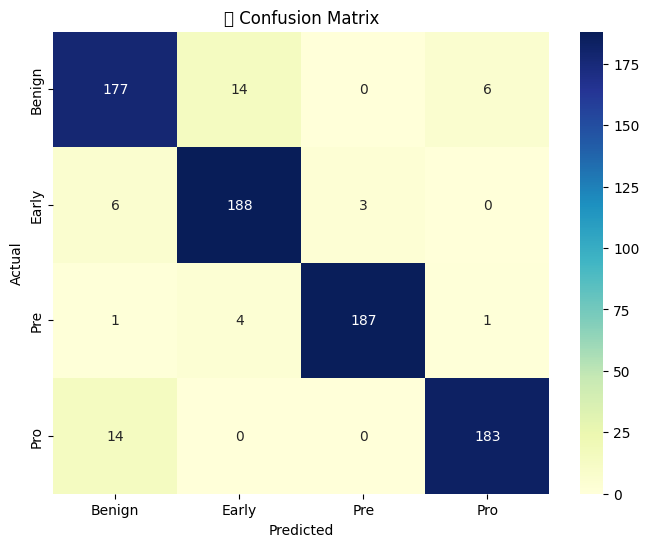

📊 Classification Report:

              precision    recall  f1-score   support

      Benign       0.89      0.90      0.90       197
       Early       0.91      0.95      0.93       197
         Pre       0.98      0.97      0.98       193
         Pro       0.96      0.93      0.95       197

    accuracy                           0.94       784
   macro avg       0.94      0.94      0.94       784
weighted avg       0.94      0.94      0.94       784



In [33]:
class_names=['Benign', 'Early', 'Pre', 'Pro']



cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)

plt.title("💡 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



print("📊 Classification Report:\n")
print(classification_report(all_labels, all_preds, target_names=class_names))


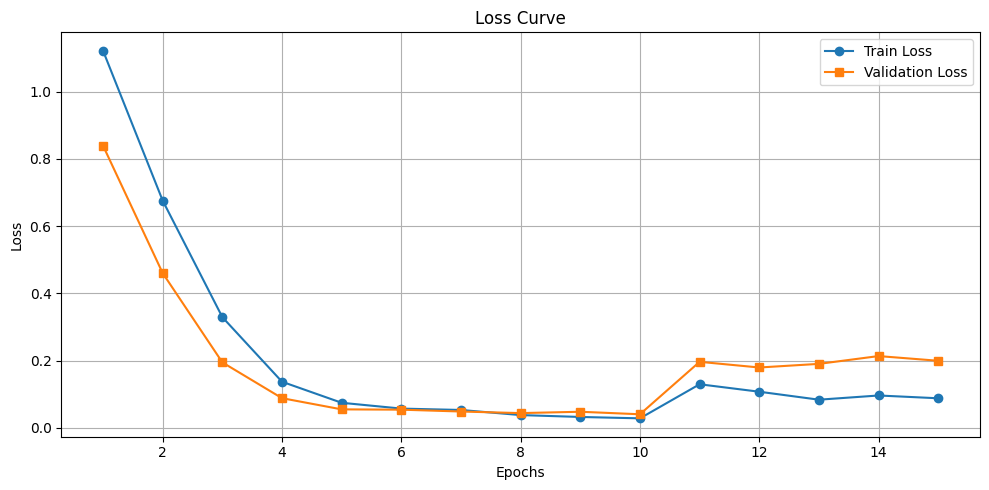

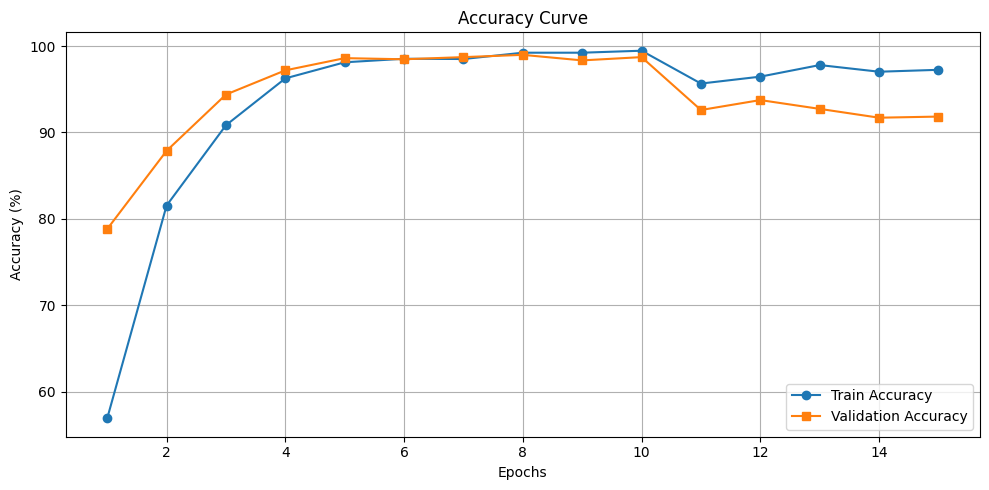

In [54]:
train_loss_list = [
    1.1222, 0.6761, 0.3293, 0.1371, 0.0745,
    0.0572, 0.0531, 0.0379, 0.0323, 0.0282,
    0.1296, 0.1074, 0.0837, 0.0962, 0.0879
]

val_loss_list = [
    0.8396, 0.4603, 0.1947, 0.0882, 0.0549,
    0.0540, 0.0485, 0.0438, 0.0478, 0.0403,
    0.1964, 0.1795, 0.1903, 0.2135, 0.1995
]

train_acc_list = [
    56.93, 81.55, 90.84, 96.26, 98.12,
    98.53, 98.50, 99.23, 99.23, 99.46,
    95.66, 96.46, 97.80, 97.03, 97.25
]

val_acc_list = [
    78.83, 87.88, 94.39, 97.19, 98.60,
    98.47, 98.72, 98.98, 98.34, 98.72,
    92.60, 93.75, 92.73, 91.71, 91.84
]

import matplotlib.pyplot as plt

epochs = range(1, 16)

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss_list, label='Train Loss', marker='o')
plt.plot(epochs, val_loss_list, label='Validation Loss', marker='s')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc_list, label='Train Accuracy', marker='o')
plt.plot(epochs, val_acc_list, label='Validation Accuracy', marker='s')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Prediction

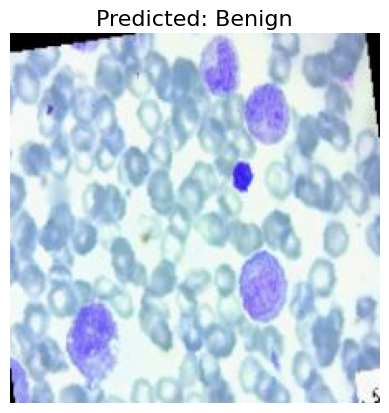

In [41]:
from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

#model
class XceptionBiGRU(nn.Module):
    def __init__(self, num_classes):
        super(XceptionBiGRU, self).__init__()
        self.cnn = timm.create_model('xception', pretrained=False, num_classes=0)

        
        # Freeze CNN (optional)
        # for param in self.cnn.parameters():
        #     param.requires_grad = False

        self.feature_dim = 2048  # Xception output
        self.sequence_len = 49   # 7x7 grid from 224x224 input(down sampl image size)

        self.gru = nn.GRU(
            input_size=self.feature_dim,
            hidden_size=256,
            num_layers=1,
            batch_first=True,
            bidirectional=True
        )

        self.fc = nn.Linear(256 * 2, num_classes)

    def forward(self, x):
        with torch.no_grad():
            feat_map = self.cnn.forward_features(x)  # [B, C, H, W](batch,chanel,h,w)
        B, C, H, W = feat_map.shape
        x_seq = feat_map.view(B, C, H * W).permute(0, 2, 1)  # [B, seq_len, C]#Rearrange
        gru_out, _ = self.gru(x_seq)
        out = gru_out[:, -1, :]  # Last timestep
        return self.fc(out)



# Load model
model = XceptionBiGRU(num_classes=4).to("cuda" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load("checkpoints/best_model.pth"))
model.eval()

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Class names (update based on your dataset)
class_names = ['Benign', 'Early', 'Pre', 'Pro']



def predict_image(image_path):
    # Load and preprocess image
    image = Image.open(image_path).convert('RGB')
    input_tensor = transform(image).unsqueeze(0).to(device)  # Shape: [1, 3, 224, 224]

    # Get CNN features
    with torch.no_grad():
        feat_map = model.cnn.forward_features(input_tensor)  # [1, 2048, 7, 7]

    # Prepare for GRU
    B, C, H, W = feat_map.shape
    x_seq = feat_map.view(B, C, H * W).permute(0, 2, 1)  # [1, 49, 2048]

    # Predict
    gru_out, _ = model.gru(x_seq)
    out = model.fc(gru_out[:, -1, :])
    _, predicted = torch.max(out, 1)
    
    pred_label = class_names[predicted.item()]
    return image, pred_label


# Image path to test
image_path = r"Y:\2024-2025\GROWTH\JUNE\Integration_of_Deep_Learning_Architectures_With_GRU_for_Automated_Leukemia_Detection_in_Peripheral_Blood_Smear_Images\Dataset\Original\Benign\aug_5_WBC-Benign-175.jpg"  # Replace with your actual image path

image, pred = predict_image(image_path)

plt.imshow(image)
plt.title(f"Predicted: {pred}", fontsize=16)
plt.axis('off')
plt.show()


# Model with EfficientNetBiGru

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
import timm
from torch.utils.data import DataLoader
from tqdm import tqdm

# -------- Model Definition --------
class EfficientNetBiGRU(nn.Module):
    def __init__(self, num_classes=4):
        super(EfficientNetBiGRU, self).__init__()
        self.cnn = timm.create_model('efficientnet_b3', pretrained=True, num_classes=0)
        
        self.feature_dim = 1536  # Output of EfficientNetB3
        self.sequence_len = 49   # Assuming 7x7 spatial grid (from 224x224 input)
        
        self.gru = nn.GRU(input_size=self.feature_dim,
                          hidden_size=256,
                          num_layers=1,
                          batch_first=True,
                          bidirectional=True)

        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(256 * 2, num_classes)

    def forward(self, x):
        with torch.no_grad():  # Freeze CNN
            feat_map = self.cnn.forward_features(x)  # [B, C, H, W]
        
        B, C, H, W = feat_map.shape
        feat_seq = feat_map.view(B, C, H * W).permute(0, 2, 1)  # [B, 49, C]

        out, _ = self.gru(feat_seq)  # [B, 49, 512]
        out = out[:, -1, :]  # Take last time step [B, 512]
        out = self.dropout(out)
        return self.fc(out)



# training

In [48]:
import os
import torch
import torch.nn as nn
import torch.optim as optim

# --------------------- CONFIG ---------------------
NUM_CLASSES = 4
EPOCHS = 15
LEARNING_RATE = 1e-4
SAVE_DIR = "checkpoints_effnet_bigru"
os.makedirs(SAVE_DIR, exist_ok=True)

# --------------------- TRAINING ---------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EfficientNetBiGRU(num_classes=NUM_CLASSES).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

best_acc = 0.0
print("🚀 Training started...\n")

for epoch in range(1, EPOCHS + 1):
    model.train()
    running_loss = 0.0
    train_correct = 0

    print(f"📘 Epoch {epoch} started...")

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = outputs.max(1)
        train_correct += (preds == labels).sum().item()

    train_acc = 100.0 * train_correct / len(train_loader.dataset)
    train_loss = running_loss / len(train_loader)

    # -------- Evaluation --------
    model.eval()
    val_loss = 0.0
    val_correct = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()

    val_acc = 100.0 * val_correct / len(test_loader.dataset)
    val_loss = val_loss / len(test_loader)

    print(f"✅ Epoch {epoch} completed.")
    print(f"🔹 Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"🔸 Test Loss:  {val_loss:.4f} | Test Acc:  {val_acc:.2f}%\n")

    # Save best model only
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), os.path.join(SAVE_DIR, "best_model.pth"))
        print(f"💾 Best model updated at epoch {epoch} with acc: {best_acc:.2f}%\n")

# Save final model
torch.save(model.state_dict(), os.path.join(SAVE_DIR, "final_model.pth"))
print("🎉 Training complete! Best Acc: {:.2f}%".format(best_acc))


c:\Users\1033\.conda\envs\envs\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\1033\.cache\huggingface\hub\models--timm--efficientnet_b3.ra2_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


🚀 Training started...

📘 Epoch 1 started...
✅ Epoch 1 completed.
🔹 Train Loss: 1.1222 | Train Acc: 56.93%
🔸 Test Loss:  0.8396 | Test Acc:  78.83%

💾 Best model updated at epoch 1 with acc: 78.83%

📘 Epoch 2 started...
✅ Epoch 2 completed.
🔹 Train Loss: 0.6761 | Train Acc: 81.55%
🔸 Test Loss:  0.4603 | Test Acc:  87.88%

💾 Best model updated at epoch 2 with acc: 87.88%

📘 Epoch 3 started...
✅ Epoch 3 completed.
🔹 Train Loss: 0.3293 | Train Acc: 90.84%
🔸 Test Loss:  0.1947 | Test Acc:  94.39%

💾 Best model updated at epoch 3 with acc: 94.39%

📘 Epoch 4 started...
✅ Epoch 4 completed.
🔹 Train Loss: 0.1371 | Train Acc: 96.26%
🔸 Test Loss:  0.0882 | Test Acc:  97.19%

💾 Best model updated at epoch 4 with acc: 97.19%

📘 Epoch 5 started...
✅ Epoch 5 completed.
🔹 Train Loss: 0.0745 | Train Acc: 98.12%
🔸 Test Loss:  0.0549 | Test Acc:  98.60%

💾 Best model updated at epoch 5 with acc: 98.60%

📘 Epoch 6 started...
✅ Epoch 6 completed.
🔹 Train Loss: 0.0572 | Train Acc: 98.53%
🔸 Test Loss:  0.054

# Evalutaion

In [50]:
# Load and evaluate best model
model.load_state_dict(torch.load(os.path.join(SAVE_DIR, "best_model.pth")))
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())



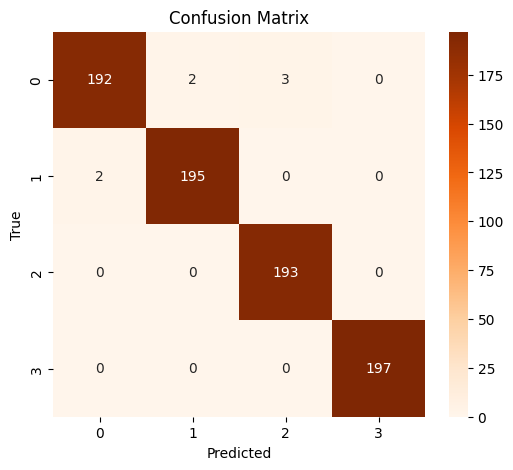


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.99      0.97      0.98       197
     Class 1       0.99      0.99      0.99       197
     Class 2       0.98      1.00      0.99       193
     Class 3       1.00      1.00      1.00       197

    accuracy                           0.99       784
   macro avg       0.99      0.99      0.99       784
weighted avg       0.99      0.99      0.99       784



In [51]:
# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report
report = classification_report(all_labels, all_preds, target_names=[f"Class {i}" for i in range(NUM_CLASSES)])
print("\nClassification Report:\n", report)



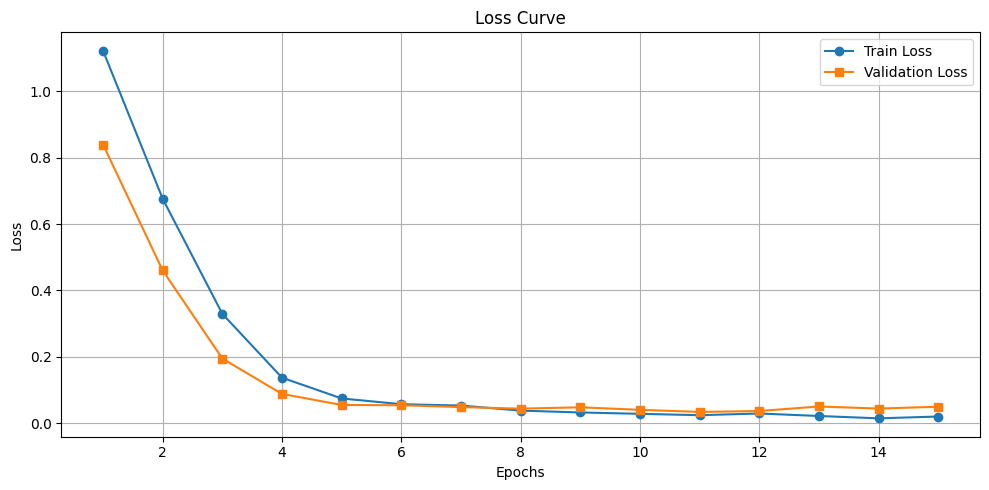

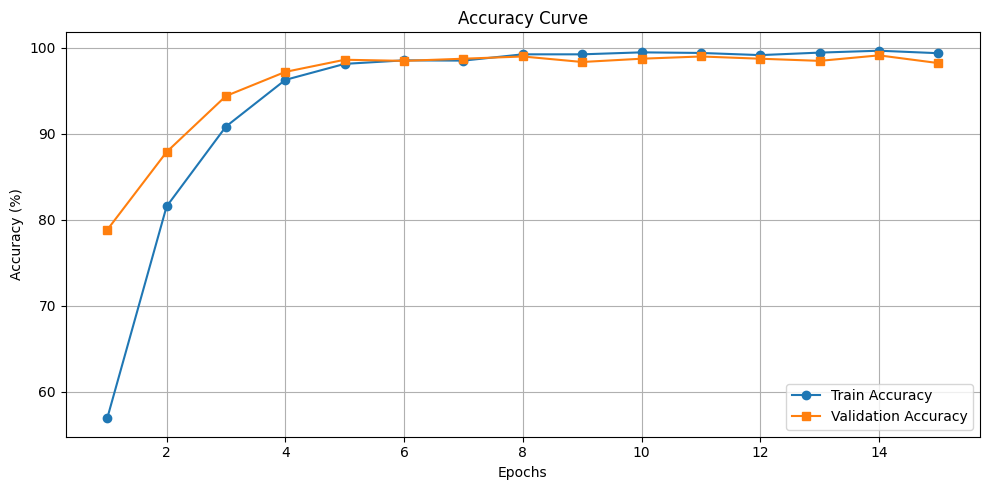

In [53]:
train_loss_list = [
    1.1222, 0.6761, 0.3293, 0.1371, 0.0745,
    0.0572, 0.0531, 0.0379, 0.0323, 0.0282,
    0.0241, 0.0292, 0.0217, 0.0146, 0.0201
]

val_loss_list = [
    0.8396, 0.4603, 0.1947, 0.0882, 0.0549,
    0.0540, 0.0485, 0.0438, 0.0478, 0.0403,
    0.0339, 0.0367, 0.0503, 0.0440, 0.0496
]

train_acc_list = [
    56.93, 81.55, 90.84, 96.26, 98.12,
    98.53, 98.50, 99.23, 99.23, 99.46,
    99.39, 99.14, 99.43, 99.65, 99.36
]

val_acc_list = [
    78.83, 87.88, 94.39, 97.19, 98.60,
    98.47, 98.72, 98.98, 98.34, 98.72,
    98.98, 98.72, 98.47, 99.11, 98.21
]


import matplotlib.pyplot as plt

epochs = range(1, 16)

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss_list, label='Train Loss', marker='o')
plt.plot(epochs, val_loss_list, label='Validation Loss', marker='s')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc_list, label='Train Accuracy', marker='o')
plt.plot(epochs, val_acc_list, label='Validation Accuracy', marker='s')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Prediction

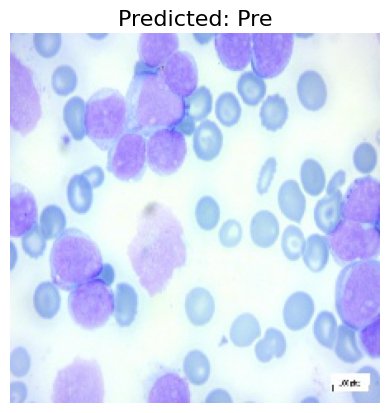

In [60]:
from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

#model
class EfficientNetBiGRU(nn.Module):
    def __init__(self, num_classes=4):
        super(EfficientNetBiGRU, self).__init__()
        self.cnn = timm.create_model('efficientnet_b3', pretrained=True, num_classes=0)
        
        self.feature_dim = 1536  # Output of EfficientNetB3
        self.sequence_len = 49   # Assuming 7x7 spatial grid (from 224x224 input)
        
        self.gru = nn.GRU(input_size=self.feature_dim,
                          hidden_size=256,
                          num_layers=1,
                          batch_first=True,
                          bidirectional=True)

        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(256 * 2, num_classes)

    def forward(self, x):
        with torch.no_grad():  # Freeze CNN
            feat_map = self.cnn.forward_features(x)  # [B, C, H, W]
        
        B, C, H, W = feat_map.shape
        feat_seq = feat_map.view(B, C, H * W).permute(0, 2, 1)  # [B, 49, C]

        out, _ = self.gru(feat_seq)  # [B, 49, 512]
        out = out[:, -1, :]  # Take last time step [B, 512]
        out = self.dropout(out)
        return self.fc(out)

# ----------------- Load Model -----------------
model_path = "checkpoints_effnet_bigru/best_model.pth"
model = EfficientNetBiGRU(num_classes=len(class_names)).to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Class names (update based on your dataset)
class_names = ['Benign', 'Early', 'Pre', 'Pro']



def predict_image(image_path):
    # Load and preprocess image
    image = Image.open(image_path).convert('RGB')
    input_tensor = transform(image).unsqueeze(0).to(device)  # Shape: [1, 3, 224, 224]

    # Get CNN features
    with torch.no_grad():
        feat_map = model.cnn.forward_features(input_tensor)  # [1, 2048, 7, 7]

    # Prepare for GRU
    B, C, H, W = feat_map.shape
    x_seq = feat_map.view(B, C, H * W).permute(0, 2, 1)  # [1, 49, 2048]

    # Predict
    gru_out, _ = model.gru(x_seq)
    out = model.fc(gru_out[:, -1, :])
    _, predicted = torch.max(out, 1)
    
    pred_label = class_names[predicted.item()]
    return image, pred_label


# Image path to test
image_path = r"Y:\2024-2025\GROWTH\JUNE\Integration_of_Deep_Learning_Architectures_With_GRU_for_Automated_Leukemia_Detection_in_Peripheral_Blood_Smear_Images\Dataset\Original\Pre\WBC-Malignant-Pre-005.jpg"

image, pred = predict_image(image_path)

plt.imshow(image)
plt.title(f"Predicted: {pred}", fontsize=16)
plt.axis('off')
plt.show()


# Model with MobileNetv3+LSTM

In [62]:
# model_mobilenet_lstm.py
import torch
import torch.nn as nn
import timm

class MobileNetLSTM(nn.Module):
    def __init__(self, num_classes=4, hidden_size=256):
        super(MobileNetLSTM, self).__init__()
        self.backbone = timm.create_model("mobilenetv3_large_100", pretrained=True, features_only=True)
        self.feature_dim = self.backbone.feature_info[-1]['num_chs']  # Usually 960
        self.lstm = nn.LSTM(self.feature_dim, hidden_size, num_layers=1, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(hidden_size * 2, num_classes)

    def forward(self, x):
        feat_map = self.backbone(x)[-1]  # [B, C, H, W]
        B, C, H, W = feat_map.size()
        x_seq = feat_map.view(B, C, H * W).permute(0, 2, 1)  # [B, 49, C]
        lstm_out, _ = self.lstm(x_seq)
        last_output = lstm_out[:, -1, :]
        return self.fc(self.dropout(last_output))


In [64]:
# train_model.py
import os
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

NUM_CLASSES = 4
EPOCHS = 15
LR = 1e-4
SAVE_DIR = "checkpoints_mobilenet_lstm"
os.makedirs(SAVE_DIR, exist_ok=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MobileNetLSTM(num_classes=NUM_CLASSES).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

train_losses, val_losses, train_accs, val_accs = [], [], [], []
best_acc = 0.0
print("🚀 Training started...\n")

for epoch in range(1, EPOCHS + 1):
    model.train()
    train_loss, correct = 0.0, 0

    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        correct += (outputs.argmax(1) == labels).sum().item()

    train_acc = 100 * correct / len(train_loader.dataset)
    avg_train_loss = train_loss / len(train_loader)

    # Validation
    model.eval()
    val_loss, val_correct = 0.0, 0
    y_true, y_pred = [], []

    with torch.no_grad():
        for imgs, labels in test_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_correct += (outputs.argmax(1) == labels).sum().item()
            y_true += labels.cpu().tolist()
            y_pred += outputs.argmax(1).cpu().tolist()

    val_acc = 100 * val_correct / len(test_loader.dataset)
    avg_val_loss = val_loss / len(test_loader)

    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"📘 Epoch {epoch} | 🔹 Train Acc: {train_acc:.2f}% | 🔸 Val Acc: {val_acc:.2f}%")

    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), os.path.join(SAVE_DIR, "best_model.pth"))
        print(f"💾 Best model saved at epoch {epoch} (Val Acc: {val_acc:.2f}%)")

# Save Final Model
torch.save(model.state_dict(), os.path.join(SAVE_DIR, "final_model.pth"))
print(f"🎉 Training Complete! Best Accuracy: {best_acc:.2f}%")


c:\Users\1033\.conda\envs\envs\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\1033\.cache\huggingface\hub\models--timm--mobilenetv3_large_100.ra_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Unexpected keys (classifier.bias, classifier.weight, conv_head.bias, conv_head.weight) found while loadi

🚀 Training started...

📘 Epoch 1 | 🔹 Train Acc: 76.37% | 🔸 Val Acc: 96.05%
💾 Best model saved at epoch 1 (Val Acc: 96.05%)
📘 Epoch 2 | 🔹 Train Acc: 97.99% | 🔸 Val Acc: 99.23%
💾 Best model saved at epoch 2 (Val Acc: 99.23%)
📘 Epoch 3 | 🔹 Train Acc: 99.52% | 🔸 Val Acc: 99.49%
💾 Best model saved at epoch 3 (Val Acc: 99.49%)
📘 Epoch 4 | 🔹 Train Acc: 99.74% | 🔸 Val Acc: 99.23%
📘 Epoch 5 | 🔹 Train Acc: 99.81% | 🔸 Val Acc: 99.49%
📘 Epoch 6 | 🔹 Train Acc: 99.94% | 🔸 Val Acc: 99.62%
💾 Best model saved at epoch 6 (Val Acc: 99.62%)
📘 Epoch 7 | 🔹 Train Acc: 99.90% | 🔸 Val Acc: 99.74%
💾 Best model saved at epoch 7 (Val Acc: 99.74%)
📘 Epoch 8 | 🔹 Train Acc: 99.94% | 🔸 Val Acc: 100.00%
💾 Best model saved at epoch 8 (Val Acc: 100.00%)
📘 Epoch 9 | 🔹 Train Acc: 99.81% | 🔸 Val Acc: 99.36%
📘 Epoch 10 | 🔹 Train Acc: 99.81% | 🔸 Val Acc: 99.87%
📘 Epoch 11 | 🔹 Train Acc: 99.97% | 🔸 Val Acc: 99.87%
📘 Epoch 12 | 🔹 Train Acc: 100.00% | 🔸 Val Acc: 100.00%
📘 Epoch 13 | 🔹 Train Acc: 99.94% | 🔸 Val Acc: 99.87%
📘 Epo

# Evaluate

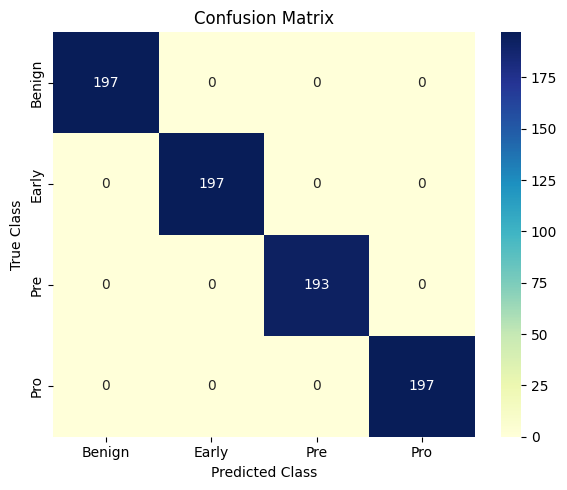


📊 Classification Report:

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       197
       Early       1.00      1.00      1.00       197
         Pre       1.00      1.00      1.00       193
         Pro       1.00      1.00      1.00       197

    accuracy                           1.00       784
   macro avg       1.00      1.00      1.00       784
weighted avg       1.00      1.00      1.00       784



In [66]:


# Load and evaluate best model
model.load_state_dict(torch.load(os.path.join(SAVE_DIR, "best_model.pth")))
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Class names
class_names = ['Benign', 'Early', 'Pre', 'Pro']

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.tight_layout()
plt.show()

# Classification Report
report = classification_report(all_labels, all_preds, target_names=class_names)
print("\n📊 Classification Report:\n")
print(report)




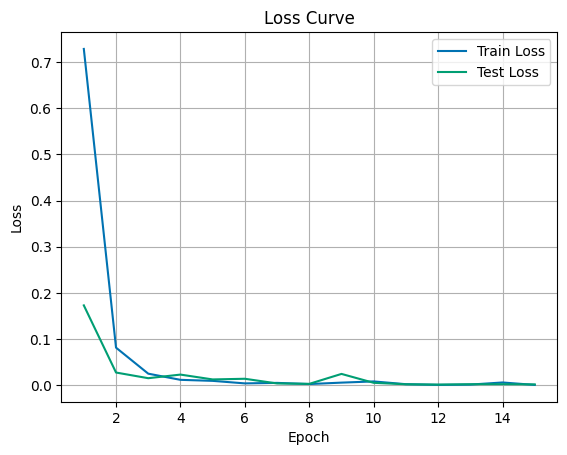

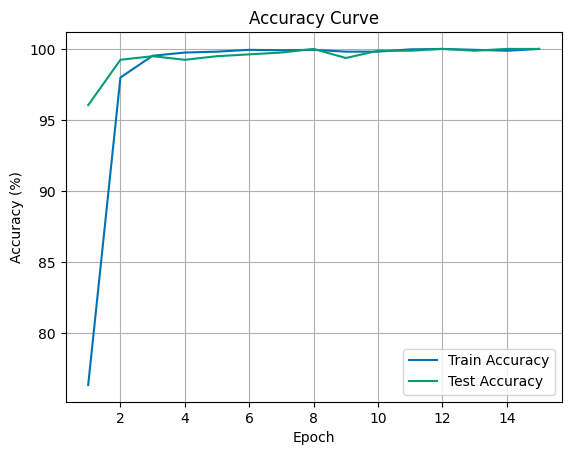

In [70]:
# Plotting Training Curves
epochs = range(1, EPOCHS + 1)


plt.figure()
plt.style.use('seaborn-v0_8-colorblind')
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, val_losses, label="Test Loss")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(epochs, train_accs, label="Train Accuracy")
plt.plot(epochs, val_accs, label="Test Accuracy")
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()

# prediction

Unexpected keys (classifier.bias, classifier.weight, conv_head.bias, conv_head.weight) found while loading pretrained weights. This may be expected if model is being adapted.


✅ Model loaded and ready for inference.


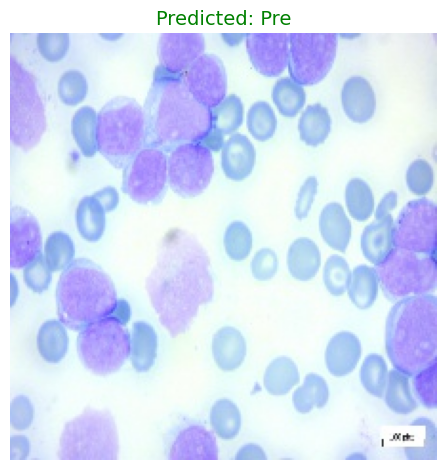

✅ Predicted Class: Pre


'Pre'

In [73]:

from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])


# model_mobilenet_lstm.py
import torch
import torch.nn as nn
import timm

class MobileNetLSTM(nn.Module):
    def __init__(self, num_classes=4, hidden_size=256):
        super(MobileNetLSTM, self).__init__()
        self.backbone = timm.create_model("mobilenetv3_large_100", pretrained=True, features_only=True)
        self.feature_dim = self.backbone.feature_info[-1]['num_chs']  # Usually 960
        self.lstm = nn.LSTM(self.feature_dim, hidden_size, num_layers=1, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(hidden_size * 2, num_classes)

    def forward(self, x):
        feat_map = self.backbone(x)[-1]  # [B, C, H, W]
        B, C, H, W = feat_map.size()
        x_seq = feat_map.view(B, C, H * W).permute(0, 2, 1)  # [B, 49, C]
        lstm_out, _ = self.lstm(x_seq)
        last_output = lstm_out[:, -1, :]
        return self.fc(self.dropout(last_output))




# Define class names
class_names = ['Benign', 'Early', 'Pre', 'Pro']

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define model instance
model = MobileNetLSTM(num_classes=len(class_names)).to(device)



# Load the trained model weights
checkpoint_path = "checkpoints_mobilenet_lstm/best_model.pth"

model.load_state_dict(torch.load(checkpoint_path, map_location=device))
model.eval()  # Set model to evaluation mode
print("✅ Model loaded and ready for inference.")




def predict_image(image_path):
  
    # Load and preprocess image
    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0).to(device)  # [1, 3, 224, 224]

    # Prediction
    model.eval()
    with torch.no_grad():
        outputs = model(input_tensor)
        _, predicted = torch.max(outputs, 1)
        pred_class = class_names[predicted.item()]

    # Display the image with prediction
    plt.imshow(image)
    plt.title(f"Predicted: {pred_class}", fontsize=14, color="green")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

    print(f"✅ Predicted Class: {pred_class}")
    return pred_class


predict_image(r"Y:\2024-2025\GROWTH\JUNE\Integration_of_Deep_Learning_Architectures_With_GRU_for_Automated_Leukemia_Detection_in_Peripheral_Blood_Smear_Images\Dataset\Original\Pre\WBC-Malignant-Pre-005.jpg")

Unexpected keys (classifier.bias, classifier.weight, conv_head.bias, conv_head.weight) found while loading pretrained weights. This may be expected if model is being adapted.


✅ Model loaded and ready for inference.


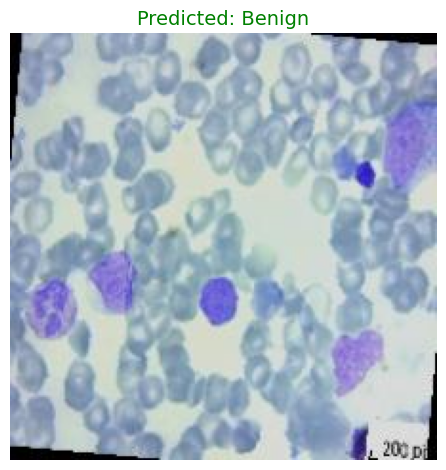

✅ Predicted Class: Benign


'Benign'

In [74]:

from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])


# model_mobilenet_lstm.py
import torch
import torch.nn as nn
import timm

class MobileNetLSTM(nn.Module):
    def __init__(self, num_classes=4, hidden_size=256):
        super(MobileNetLSTM, self).__init__()
        self.backbone = timm.create_model("mobilenetv3_large_100", pretrained=True, features_only=True)
        self.feature_dim = self.backbone.feature_info[-1]['num_chs']  # Usually 960
        self.lstm = nn.LSTM(self.feature_dim, hidden_size, num_layers=1, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(hidden_size * 2, num_classes)

    def forward(self, x):
        feat_map = self.backbone(x)[-1]  # [B, C, H, W]
        B, C, H, W = feat_map.size()
        x_seq = feat_map.view(B, C, H * W).permute(0, 2, 1)  # [B, 49, C]
        lstm_out, _ = self.lstm(x_seq)
        last_output = lstm_out[:, -1, :]
        return self.fc(self.dropout(last_output))




# Define class names
class_names = ['Benign', 'Early', 'Pre', 'Pro']

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define model instance
model = MobileNetLSTM(num_classes=len(class_names)).to(device)



# Load the trained model weights
checkpoint_path = "checkpoints_mobilenet_lstm/best_model.pth"

model.load_state_dict(torch.load(checkpoint_path, map_location=device))
model.eval()  # Set model to evaluation mode
print("✅ Model loaded and ready for inference.")




def predict_image(image_path):
  
    # Load and preprocess image
    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0).to(device)  # [1, 3, 224, 224]

    # Prediction
    model.eval()
    with torch.no_grad():
        outputs = model(input_tensor)
        _, predicted = torch.max(outputs, 1)
        pred_class = class_names[predicted.item()]

    # Display the image with prediction
    plt.imshow(image)
    plt.title(f"Predicted: {pred_class}", fontsize=14, color="green")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

    print(f"✅ Predicted Class: {pred_class}")
    return pred_class


predict_image(r"Y:\2024-2025\GROWTH\JUNE\Integration_of_Deep_Learning_Architectures_With_GRU_for_Automated_Leukemia_Detection_in_Peripheral_Blood_Smear_Images\Dataset\Original\Benign\aug_65_WBC-Benign-241.jpg")